In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
import numpy as np

# Define constants
batch_size = 32
img_height = 150
img_width = 150
data_dir = '/content/drive/MyDrive/Dataset/melanoma_cancer_dataset'
epochs = 5  # Adjust the number of epochs as needed

# Create datasets with augmentation
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    subset='training',
    seed=123
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation',
    seed=123
)

# Create test dataset
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False  # Do not shuffle for evaluation
)

models = []

for i in range(1, 11):
    model = Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    models.append((f"Model_{i}", model))


Found 790 images belonging to 2 classes.
Found 87 images belonging to 2 classes.
Found 877 images belonging to 2 classes.


28/28 [==============================] - 139s 5s/step


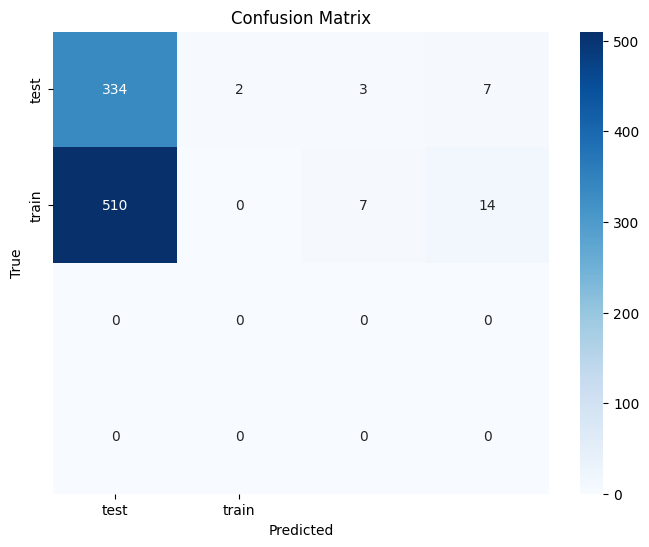

In [2]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Get the class names from the data generator
class_names = list(test_generator.class_indices.keys())

# Predictions on the test set
y_true = test_generator.classes
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



Training Model_1...
Epoch 1/5
25/25 [==============================] - 42s 2s/step - loss: 0.9743 - accuracy: 0.4797 - val_loss: 0.7093 - val_accuracy: 0.6092
Epoch 2/5
25/25 [==============================] - 44s 2s/step - loss: 0.7294 - accuracy: 0.5468 - val_loss: 0.6738 - val_accuracy: 0.6092
Epoch 3/5
25/25 [==============================] - 41s 2s/step - loss: 0.7315 - accuracy: 0.5646 - val_loss: 0.6722 - val_accuracy: 0.6092
Epoch 4/5
25/25 [==============================] - 43s 2s/step - loss: 0.7081 - accuracy: 0.5785 - val_loss: 0.6673 - val_accuracy: 0.6092
Epoch 5/5
28/28 [==============================] - 13s 481ms/step - loss: 0.6690 - accuracy: 0.6055

Test accuracy for Model_1: 0.6055
28/28 [==============================] - 13s 478ms/step
Confusion Matrix for Model_1:
[[  0 346]
 [  0 531]]
Accuracy for Model_1: 0.6055
Sensitivity (Recall) for Model_1: 1.0000
Specificity for Model_1: 0.0000

Classification Report for Model_1:
              precision    recall  f1-sco

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


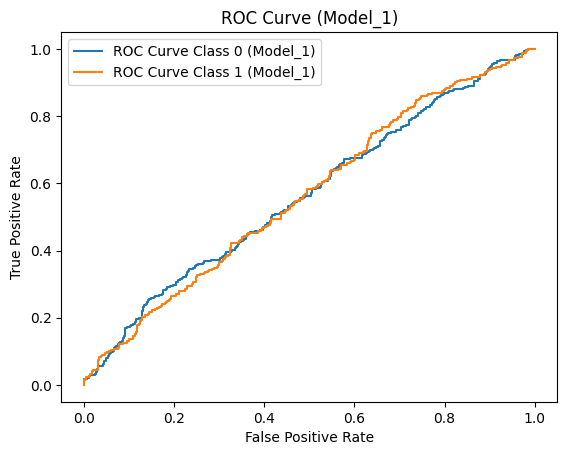


Training Model_2...
Epoch 1/5
25/25 [==============================] - 45s 2s/step - loss: 1.1700 - accuracy: 0.5215 - val_loss: 0.7287 - val_accuracy: 0.6092
Epoch 2/5
25/25 [==============================] - 40s 2s/step - loss: 0.7962 - accuracy: 0.5582 - val_loss: 0.6836 - val_accuracy: 0.6092
Epoch 3/5
25/25 [==============================] - 43s 2s/step - loss: 0.7814 - accuracy: 0.5557 - val_loss: 0.6794 - val_accuracy: 0.6092
Epoch 4/5
25/25 [==============================] - 41s 2s/step - loss: 0.7413 - accuracy: 0.5671 - val_loss: 0.6701 - val_accuracy: 0.6092
Epoch 5/5
28/28 [==============================] - 13s 462ms/step - loss: 0.6633 - accuracy: 0.6009

Test accuracy for Model_2: 0.6009
28/28 [==============================] - 13s 478ms/step
Confusion Matrix for Model_2:
[[ 31 315]
 [ 35 496]]
Accuracy for Model_2: 0.6009
Sensitivity (Recall) for Model_2: 0.9341
Specificity for Model_2: 0.0896

Classification Report for Model_2:
              precision    recall  f1-sco

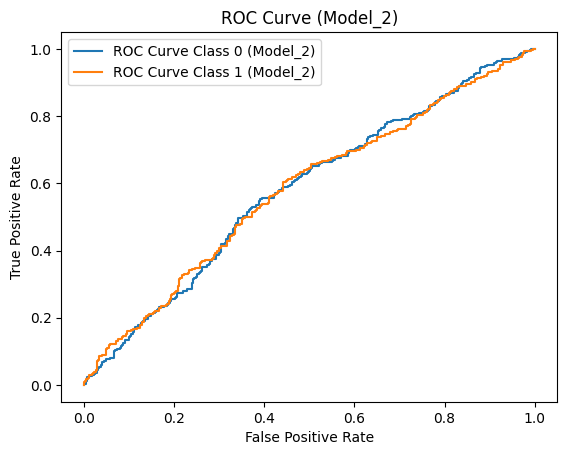


Training Model_3...
Epoch 1/5
25/25 [==============================] - 43s 2s/step - loss: 0.8815 - accuracy: 0.5392 - val_loss: 0.6730 - val_accuracy: 0.6092
Epoch 2/5
25/25 [==============================] - 41s 2s/step - loss: 0.7365 - accuracy: 0.5835 - val_loss: 0.6682 - val_accuracy: 0.6092
Epoch 3/5
25/25 [==============================] - 41s 2s/step - loss: 0.7288 - accuracy: 0.5722 - val_loss: 0.6700 - val_accuracy: 0.6092
Epoch 4/5
25/25 [==============================] - 42s 2s/step - loss: 0.7059 - accuracy: 0.5671 - val_loss: 0.6857 - val_accuracy: 0.6207
Epoch 5/5
28/28 [==============================] - 17s 562ms/step - loss: 0.6644 - accuracy: 0.6055

Test accuracy for Model_3: 0.6055
28/28 [==============================] - 12s 426ms/step
Confusion Matrix for Model_3:
[[  0 346]
 [  0 531]]
Accuracy for Model_3: 0.6055
Sensitivity (Recall) for Model_3: 1.0000
Specificity for Model_3: 0.0000

Classification Report for Model_3:
              precision    recall  f1-sco

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


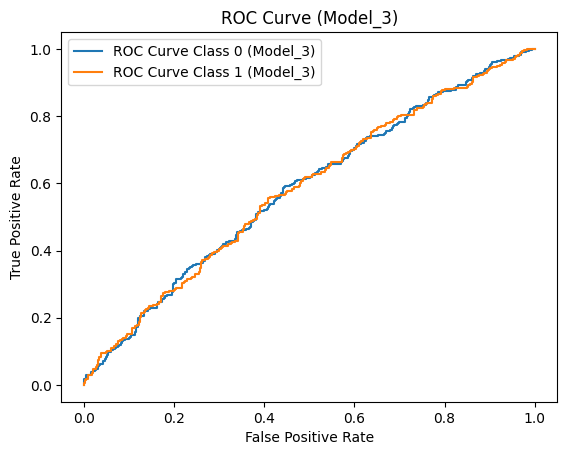


Training Model_4...
Epoch 1/5
25/25 [==============================] - 45s 2s/step - loss: 1.6053 - accuracy: 0.5278 - val_loss: 0.6770 - val_accuracy: 0.6092
Epoch 2/5
25/25 [==============================] - 41s 2s/step - loss: 0.7157 - accuracy: 0.5658 - val_loss: 0.6740 - val_accuracy: 0.6092
Epoch 3/5
25/25 [==============================] - 43s 2s/step - loss: 0.6973 - accuracy: 0.5633 - val_loss: 0.6800 - val_accuracy: 0.6092
Epoch 4/5
25/25 [==============================] - 41s 2s/step - loss: 0.6913 - accuracy: 0.5924 - val_loss: 0.6736 - val_accuracy: 0.6092
Epoch 5/5
28/28 [==============================] - 13s 474ms/step - loss: 0.6675 - accuracy: 0.6055

Test accuracy for Model_4: 0.6055
28/28 [==============================] - 13s 476ms/step
Confusion Matrix for Model_4:
[[  0 346]
 [  0 531]]
Accuracy for Model_4: 0.6055
Sensitivity (Recall) for Model_4: 1.0000
Specificity for Model_4: 0.0000

Classification Report for Model_4:
              precision    recall  f1-sco

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


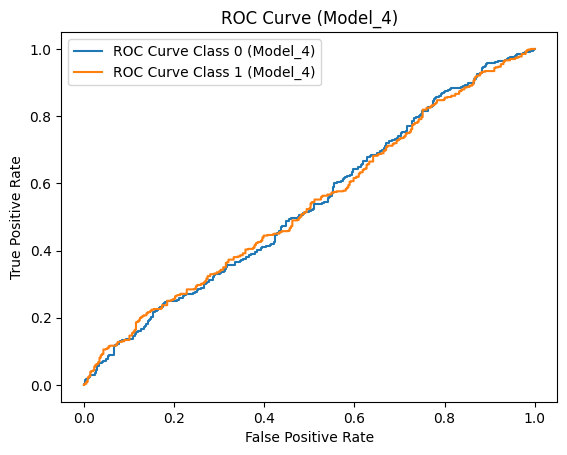


Training Model_5...
Epoch 1/5
25/25 [==============================] - 44s 2s/step - loss: 1.1402 - accuracy: 0.5266 - val_loss: 0.6675 - val_accuracy: 0.6092
Epoch 2/5
25/25 [==============================] - 41s 2s/step - loss: 0.7117 - accuracy: 0.5785 - val_loss: 0.6681 - val_accuracy: 0.6092
Epoch 3/5
25/25 [==============================] - 42s 2s/step - loss: 0.7068 - accuracy: 0.5595 - val_loss: 0.6697 - val_accuracy: 0.6092
Epoch 4/5
25/25 [==============================] - 41s 2s/step - loss: 0.6979 - accuracy: 0.5709 - val_loss: 0.6739 - val_accuracy: 0.6092
Epoch 5/5
28/28 [==============================] - 11s 403ms/step - loss: 0.6669 - accuracy: 0.6055

Test accuracy for Model_5: 0.6055
28/28 [==============================] - 13s 435ms/step
Confusion Matrix for Model_5:
[[  0 346]
 [  0 531]]
Accuracy for Model_5: 0.6055
Sensitivity (Recall) for Model_5: 1.0000
Specificity for Model_5: 0.0000

Classification Report for Model_5:
              precision    recall  f1-sco

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


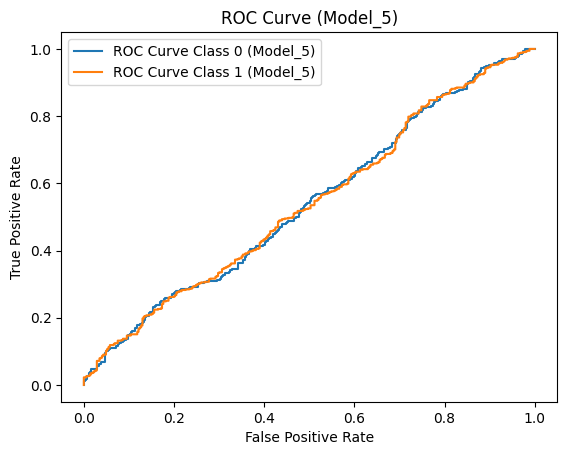


Training Model_6...
Epoch 1/5
25/25 [==============================] - 44s 2s/step - loss: 1.0499 - accuracy: 0.5190 - val_loss: 0.6779 - val_accuracy: 0.6092
Epoch 2/5
25/25 [==============================] - 41s 2s/step - loss: 0.7451 - accuracy: 0.5582 - val_loss: 0.6760 - val_accuracy: 0.6092
Epoch 3/5
25/25 [==============================] - 43s 2s/step - loss: 0.7239 - accuracy: 0.5671 - val_loss: 0.6777 - val_accuracy: 0.6092
Epoch 4/5
25/25 [==============================] - 41s 2s/step - loss: 0.7120 - accuracy: 0.5797 - val_loss: 0.6772 - val_accuracy: 0.6092
Epoch 5/5
28/28 [==============================] - 12s 419ms/step - loss: 0.6676 - accuracy: 0.6055

Test accuracy for Model_6: 0.6055
28/28 [==============================] - 13s 471ms/step
Confusion Matrix for Model_6:
[[  0 346]
 [  0 531]]
Accuracy for Model_6: 0.6055
Sensitivity (Recall) for Model_6: 1.0000
Specificity for Model_6: 0.0000

Classification Report for Model_6:
              precision    recall  f1-sco

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


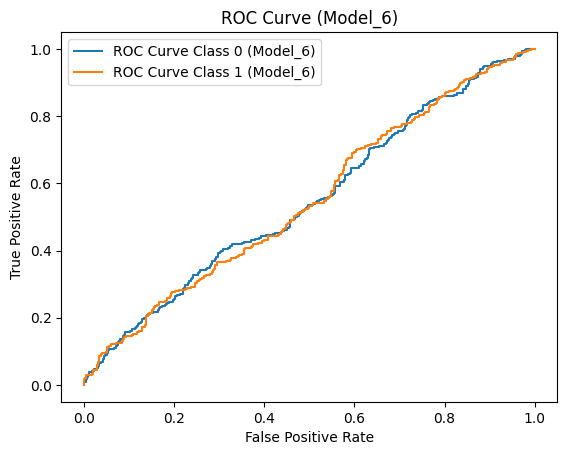


Training Model_7...
Epoch 1/5
25/25 [==============================] - 43s 2s/step - loss: 0.9624 - accuracy: 0.5316 - val_loss: 0.6879 - val_accuracy: 0.6092
Epoch 2/5
25/25 [==============================] - 45s 2s/step - loss: 0.7445 - accuracy: 0.5430 - val_loss: 0.6724 - val_accuracy: 0.6092
Epoch 3/5
25/25 [==============================] - 41s 2s/step - loss: 0.7204 - accuracy: 0.5633 - val_loss: 0.6688 - val_accuracy: 0.6092
Epoch 4/5
25/25 [==============================] - 43s 2s/step - loss: 0.7162 - accuracy: 0.5734 - val_loss: 0.6707 - val_accuracy: 0.6092
Epoch 5/5
28/28 [==============================] - 12s 421ms/step - loss: 0.6706 - accuracy: 0.6055

Test accuracy for Model_7: 0.6055
28/28 [==============================] - 13s 471ms/step
Confusion Matrix for Model_7:
[[  0 346]
 [  0 531]]
Accuracy for Model_7: 0.6055
Sensitivity (Recall) for Model_7: 1.0000
Specificity for Model_7: 0.0000

Classification Report for Model_7:
              precision    recall  f1-sco

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


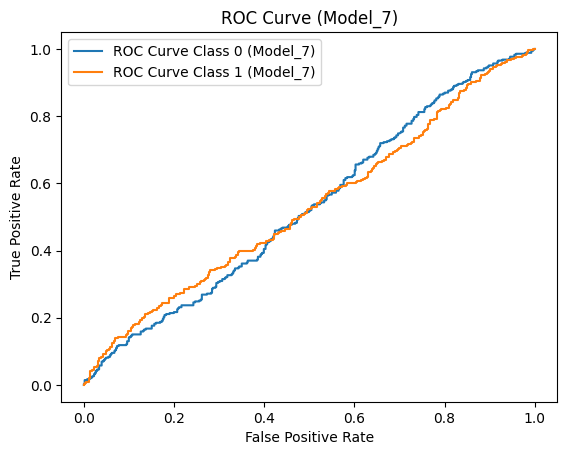


Training Model_8...
Epoch 1/5
25/25 [==============================] - 43s 2s/step - loss: 1.1842 - accuracy: 0.5051 - val_loss: 0.7008 - val_accuracy: 0.6092
Epoch 2/5
25/25 [==============================] - 44s 2s/step - loss: 0.7507 - accuracy: 0.5506 - val_loss: 0.6750 - val_accuracy: 0.6092
Epoch 3/5
25/25 [==============================] - 42s 2s/step - loss: 0.7392 - accuracy: 0.5544 - val_loss: 0.6731 - val_accuracy: 0.6092
Epoch 4/5
25/25 [==============================] - 43s 2s/step - loss: 0.7006 - accuracy: 0.5772 - val_loss: 0.6678 - val_accuracy: 0.6092
Epoch 5/5
28/28 [==============================] - 13s 471ms/step - loss: 0.6694 - accuracy: 0.6055

Test accuracy for Model_8: 0.6055
28/28 [==============================] - 11s 378ms/step
Confusion Matrix for Model_8:
[[  0 346]
 [  0 531]]
Accuracy for Model_8: 0.6055
Sensitivity (Recall) for Model_8: 1.0000
Specificity for Model_8: 0.0000

Classification Report for Model_8:
              precision    recall  f1-sco

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


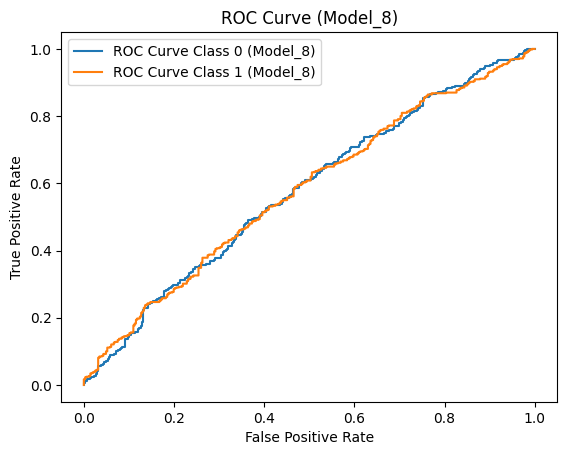


Training Model_9...
Epoch 1/5
25/25 [==============================] - 44s 2s/step - loss: 1.1921 - accuracy: 0.5696 - val_loss: 0.7704 - val_accuracy: 0.4023
Epoch 2/5
25/25 [==============================] - 41s 2s/step - loss: 0.7751 - accuracy: 0.5595 - val_loss: 0.6825 - val_accuracy: 0.6092
Epoch 3/5
25/25 [==============================] - 42s 2s/step - loss: 0.7524 - accuracy: 0.5671 - val_loss: 0.6815 - val_accuracy: 0.6092
Epoch 4/5
25/25 [==============================] - 40s 2s/step - loss: 0.7218 - accuracy: 0.5570 - val_loss: 0.6836 - val_accuracy: 0.6092
Epoch 5/5
28/28 [==============================] - 12s 437ms/step - loss: 0.6693 - accuracy: 0.6055

Test accuracy for Model_9: 0.6055
28/28 [==============================] - 14s 482ms/step
Confusion Matrix for Model_9:
[[  0 346]
 [  0 531]]
Accuracy for Model_9: 0.6055
Sensitivity (Recall) for Model_9: 1.0000
Specificity for Model_9: 0.0000

Classification Report for Model_9:
              precision    recall  f1-sco

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


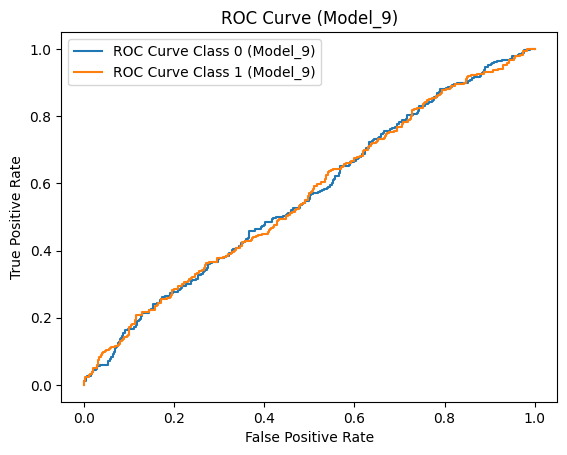


Training Model_10...
Epoch 1/5
25/25 [==============================] - 43s 2s/step - loss: 1.2057 - accuracy: 0.5481 - val_loss: 0.7136 - val_accuracy: 0.6092
Epoch 2/5
25/25 [==============================] - 50s 2s/step - loss: 0.7822 - accuracy: 0.5772 - val_loss: 0.6873 - val_accuracy: 0.6092
Epoch 3/5
25/25 [==============================] - 41s 2s/step - loss: 0.7452 - accuracy: 0.5696 - val_loss: 0.6793 - val_accuracy: 0.6092
Epoch 4/5
25/25 [==============================] - 43s 2s/step - loss: 0.7127 - accuracy: 0.5785 - val_loss: 0.6699 - val_accuracy: 0.6092
Epoch 5/5
28/28 [==============================] - 14s 483ms/step - loss: 0.6629 - accuracy: 0.6055

Test accuracy for Model_10: 0.6055
28/28 [==============================] - 13s 480ms/step
Confusion Matrix for Model_10:
[[  0 346]
 [  0 531]]
Accuracy for Model_10: 0.6055
Sensitivity (Recall) for Model_10: 1.0000
Specificity for Model_10: 0.0000

Classification Report for Model_10:
              precision    recall 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


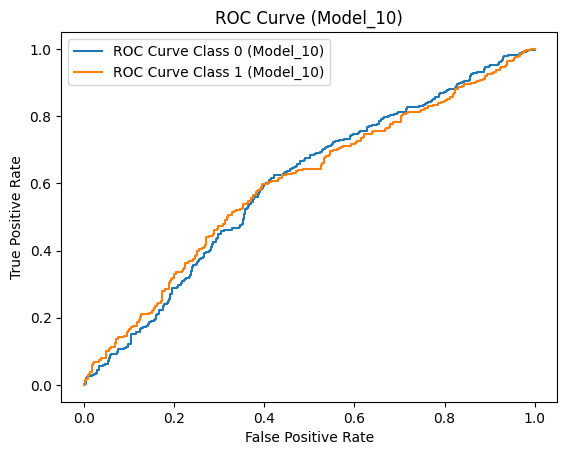

In [ ]:
for model_name, model in models:
    print(f"\nTraining {model_name}...")
    history = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=epochs
    )

    # Evaluate the model on the test set
    test_loss, test_acc = model.evaluate(test_generator)
    print(f'\nTest accuracy for {model_name}: {test_acc:.4f}')

    # Predictions on the test set
    y_true = test_generator.classes
    y_pred_probs = model.predict(test_generator)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Calculate metrics from the confusion matrix
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    print(f'Confusion Matrix for {model_name}:\n{cm}')
    print(f'Accuracy for {model_name}: {accuracy:.4f}')
    print(f'Sensitivity (Recall) for {model_name}: {sensitivity:.4f}')
    print(f'Specificity for {model_name}: {specificity:.4f}')

    # Classification Report
    print(f'\nClassification Report for {model_name}:\n{classification_report(y_true, y_pred)}')

    # Plot ROC curve (for multi-class classification)
    if len(np.unique(y_true)) > 1:
        fpr = dict()
        tpr = dict()
        for i in range(len(np.unique(y_true))):
            fpr[i], tpr[i], _ = roc_curve(tf.keras.utils.to_categorical(y_true)[:, i], y_pred_probs[:, i])
            plt.plot(fpr[i], tpr[i], label=f'ROC Curve Class {i} ({model_name})')

        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve ({model_name})')
        plt.legend()
        plt.show()